In [1]:
from skimage.external.tifffile import imread, imsave
import matplotlib.pyplot as plt
import numpy as np
import toolbox.alignment as al
import toolbox.point_fitting as pt
import toolbox.testdata as test
%matplotlib inline

So here are the distributions pre filtering, same as before.

Text(0.5,0,'individual test images')

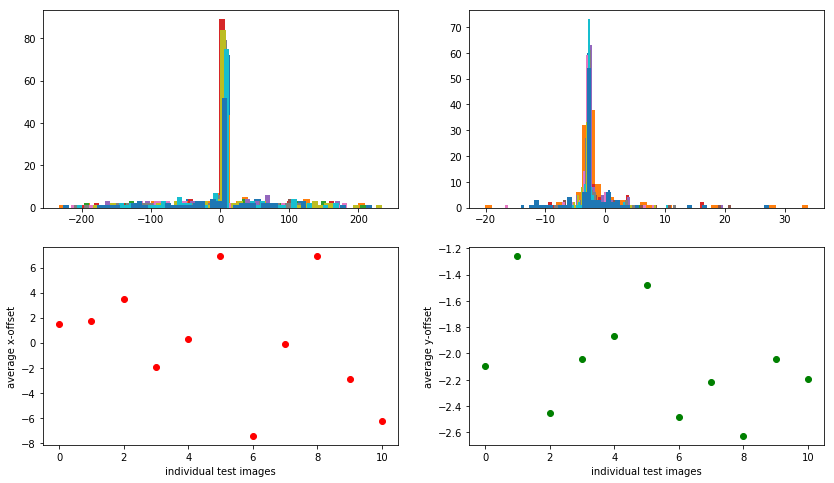

In [2]:
mean_x, mean_y = [],[]
fig = plt.figure(figsize=(14,8))
ax1 = fig.add_subplot(221)  
ax2 = fig.add_subplot(222)  
for im in test.image_stack():
    xdist,ydist = al.get_offset_distribution(im)
    mean_x.append(np.mean(xdist))
    mean_y.append(np.mean(ydist))
    ax1.hist(xdist,50)
    ax2.hist(ydist,50)

ax3 = fig.add_subplot(223)  
ax3.plot(mean_x,"ro")
ax3.set_ylabel("average x-offset")
ax3.set_xlabel("individual test images")
ax4 = fig.add_subplot(224)
ax4.plot(mean_y,"go")
ax4.set_ylabel("average y-offset")
ax4.set_xlabel("individual test images")


Okay heres the new filter in action. I havent yet figured out the best way to visualize user optimization of parameters yet, but for now it spits out histograms.

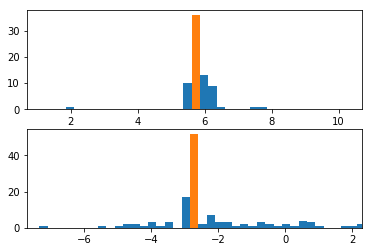

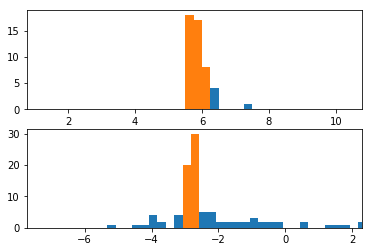

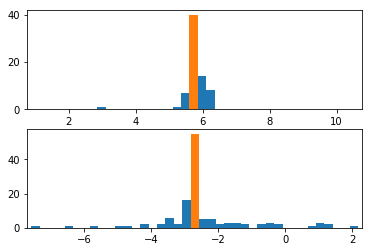

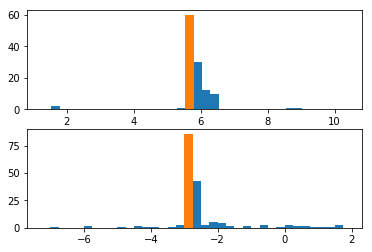

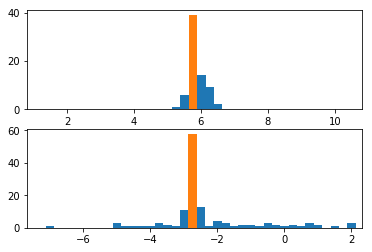

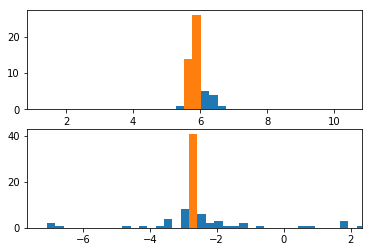

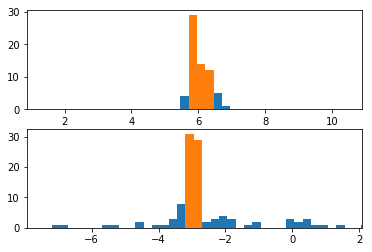

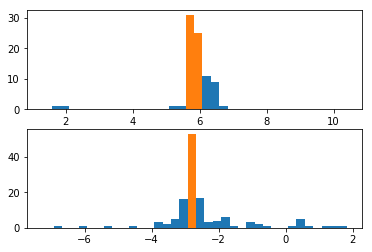

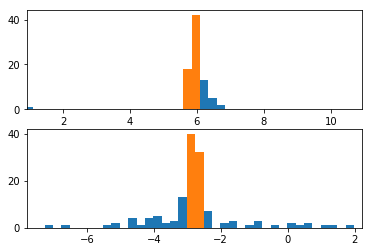

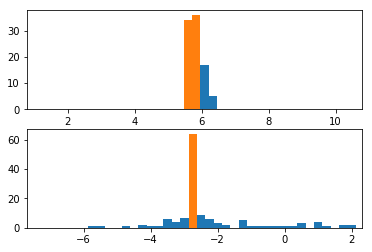

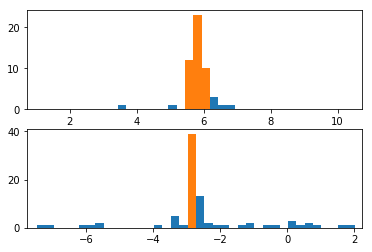

In [3]:
for im in test.image_stack():
    fig = al.show_filtering(im,.4,.25,5)

Okay, the next two plots are from the original notebook, but using this new filter and the settings I picked above.

percent change in x and y distributions post-scrub:  27 40
percent change in x and y distributions post-scrub:  38 44
percent change in x and y distributions post-scrub:  31 42
percent change in x and y distributions post-scrub:  41 60
percent change in x and y distributions post-scrub:  28 42
percent change in x and y distributions post-scrub:  45 46
percent change in x and y distributions post-scrub:  49 54
percent change in x and y distributions post-scrub:  39 37
percent change in x and y distributions post-scrub:  44 52
percent change in x and y distributions post-scrub:  51 47
percent change in x and y distributions post-scrub:  45 39


Text(0.5,0,'individual test images')

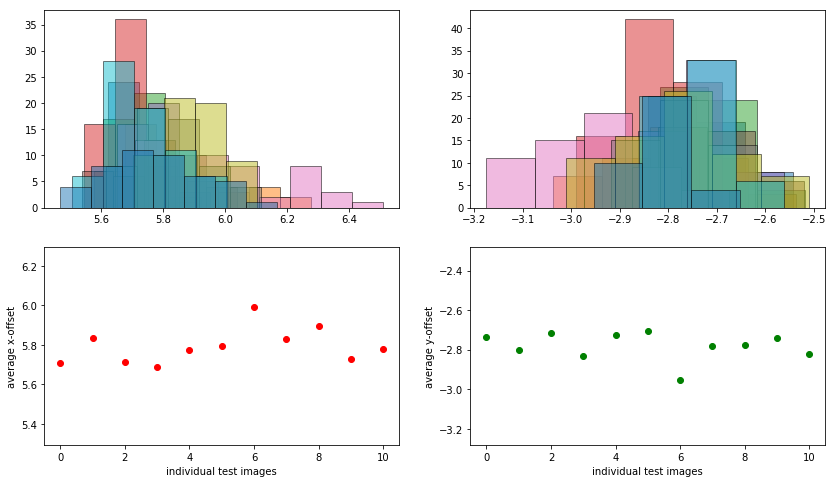

In [4]:
mean_x, mean_y = [],[]
fig = plt.figure(figsize=(14,8))
ax1 = fig.add_subplot(221)  
ax2 = fig.add_subplot(222)  
for im in test.image_stack():
    xdist,ydist = al.get_offset_distribution(im)
    
    
    scrubbed_x = al.pinhole_filter(xdist,.4,.25)
    scrubbed_y = al.pinhole_filter(ydist,.4,.25)
    
    
    print("percent change in x and y distributions post-scrub: ",
          int((len(scrubbed_x)/len(xdist))*100),
          int((len(scrubbed_y)/len(ydist))*100))
    mean_x.append(np.mean(scrubbed_x))
    mean_y.append(np.mean(scrubbed_y))
    
    ax1.hist(scrubbed_x,al.make_bins(scrubbed_x,.1),ec = 'k',alpha = .5)
    ax2.hist(scrubbed_y,al.make_bins(scrubbed_y,.1),ec = 'k',alpha = .5)

ax3 = fig.add_subplot(223)  
ax3.plot(mean_x,"ro")
ax3.set_ylim(np.mean(mean_x)-.5,np.mean(mean_x)+.5)
ax3.set_ylabel("average x-offset")
ax3.set_xlabel("individual test images")
ax4 = fig.add_subplot(224)
ax4.plot(mean_y,"go") 
ax4.set_ylim(np.mean(mean_y)-.5,np.mean(mean_y)+.5)
ax4.set_ylabel("average y-offset")
ax4.set_xlabel("individual test images")

So here's the global distribution, same parameters.

displacements in x
norm fit moments:  (5.7977044352149845, 0.14902691429985152)
skewnorm fit moments:  (3.7579792759534687, 5.624119250577113, 0.22877979178844693)
displacements in y
norm fit moments:  (-2.784978631023439, 0.10567844521926946)
skewnorm fit moments:  (-2.696388219602274, -2.6673832318786537, 0.15810339114305427)


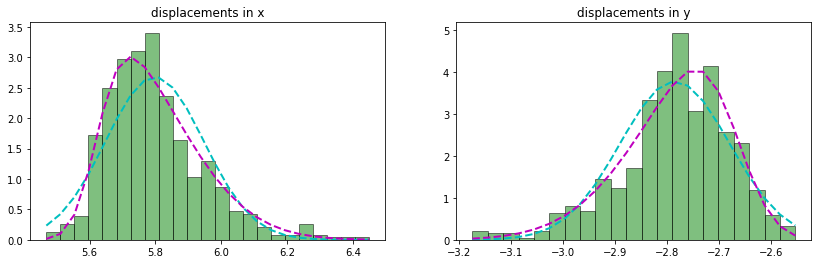

In [5]:
from scipy.stats import norm,skewnorm
import matplotlib.mlab as mlab
pooled_x, pooled_y = [],[]
fig = plt.figure(figsize=(14,4))
ax1 = fig.add_subplot(121)  
ax2 = fig.add_subplot(122)  

for im in test.image_stack():
    xdist,ydist = al.get_offset_distribution(im)
    pooled_x+=al.pinhole_filter(xdist,.4,.25)   
    pooled_y+=al.pinhole_filter(ydist,.4,.25)   

n1,bins1,patches1 = ax1.hist(pooled_x,al.FD_rule_bins(pooled_x), density=1, fc = "g",ec = "k",alpha = .5)
n2,bins2,patches2 = ax2.hist(pooled_y,al.FD_rule_bins(pooled_y), density=1, fc = "g",ec = "k",alpha = .5)

moments_norm = norm.fit(pooled_x)
moments_skew = skewnorm.fit(pooled_x)
ax1.plot(bins1, norm.pdf(bins1,*moments_norm), 'c--', linewidth=2)
ax1.plot(bins1, skewnorm.pdf(bins1,*moments_skew), 'm--', linewidth=2)
ax1.set_title("displacements in x")
print("displacements in x")
print("norm fit moments: ",moments_norm)
print("skewnorm fit moments: ",moments_skew)
moments_norm = norm.fit(pooled_y)
moments_skew = skewnorm.fit(pooled_y)
ax2.plot(bins2, norm.pdf(bins2,*moments_norm), 'c--', linewidth=2)
ax2.plot(bins2, skewnorm.pdf(bins2,*moments_skew), 'm--', linewidth=2)
ax2.set_title("displacements in y")
print("displacements in y")
print("norm fit moments: ",moments_norm)
print("skewnorm fit moments: ",moments_skew)

In [2]:
global_dx,global_dy = al.find_global_offset(test.image_stack())
print(global_dx,global_dy)

5.637444784024051 -2.898984925943681


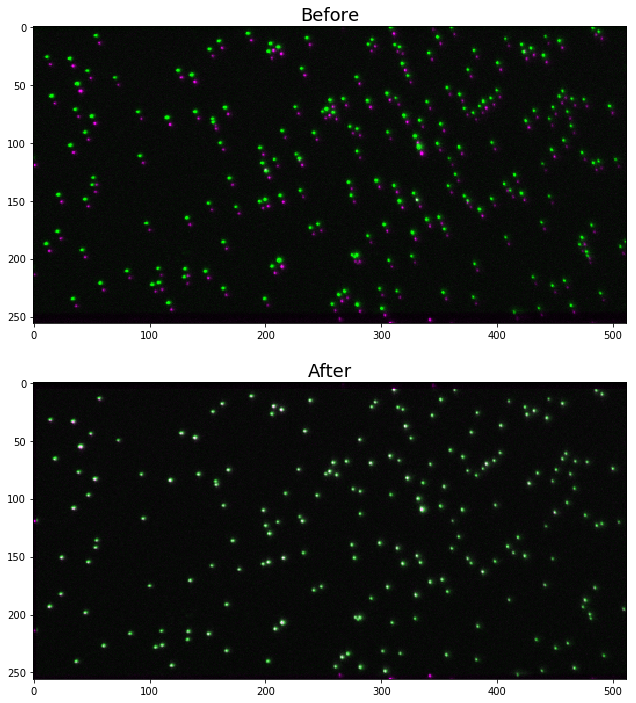

In [5]:
im = test.image_stack()[3]
adj_image = al.align_by_offset(im,global_dx,global_dy)
im_old = al.overlay(im)
im_new = al.overlay(adj_image)
    
fig = plt.figure(figsize=(12,12))
ax1 = fig.add_subplot(211)  
ax2 = fig.add_subplot(212,sharex=ax1)
ax1.set_title('Before', fontsize = "18")
ax2.set_title('After', fontsize = "18")
ax1.imshow(im_old)
ax2.imshow(im_new)
